<a href="https://colab.research.google.com/github/eewonz/ml4ai/blob/main/Midterm_ai4ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mid-term exam on Machine Learning for AI

- Name:  
- ID Number:  

------------------------------------------
Copy this notebook to your google drive.  
Good luck! :)


In [25]:
import pandas as pd


Downloading datasets

In [26]:
!gdown --id 1uAgj40UQKq2bO_OBVEqr0lihB0p2DjTb

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1uAgj40UQKq2bO_OBVEqr0lihB0p2DjTb
To: /content/covid19_cases.csv
100% 3.06M/3.06M [00:00<00:00, 19.9MB/s]


In [27]:
covid = pd.read_csv('covid19_cases.csv').assign(
    dateRep=lambda x: pd.to_datetime(x.dateRep, format='%d/%m/%Y')
)

In [28]:
covid.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-09-19,19,9,2020,47,1,Afghanistan,AF,AFG,38041757.0,Asia,1.616645
1,2020-09-18,18,9,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,1.535155
2,2020-09-17,17,9,2020,17,0,Afghanistan,AF,AFG,38041757.0,Asia,1.653446
3,2020-09-16,16,9,2020,40,10,Afghanistan,AF,AFG,38041757.0,Asia,1.708649
4,2020-09-15,15,9,2020,99,6,Afghanistan,AF,AFG,38041757.0,Asia,1.627159


### Q1 From Covid19 data (covid), try to set 'dateRep' as index

In [29]:
covid.head(2)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-09-19,19,9,2020,47,1,Afghanistan,AF,AFG,38041757.0,Asia,1.616645
1,2020-09-18,18,9,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,1.535155


In [30]:
## Your codes here
covid.set_index('dateRep', inplace=True)

In [31]:
covid.head(2)

,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
dateRep,,,,,,,,,,,
2020-09-19,19,9,2020,47,1,Afghanistan,AF,AFG,38041757.0,Asia,1.616645
2020-09-18,18,9,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,1.535155


### Q2 How many unique countries in the covid data?

In [32]:
## Your code here
unique_countries = covid['countriesAndTerritories'].nunique()
print(f'COVID-19 데이터에 고유한 국가가 {unique_countries}개 있습니다.')

COVID-19 데이터에 고유한 국가가 210개 있습니다.


Your answer here:

### Q3 Let's take subset of the covid data that meets following conditions:
 - Country names starting with A.
 - Months of May, June, and July on 2020


In [33]:
## Your code here
# "A"로 시작하는 국가 데이터 필터링
subset_a_countries = covid[covid['countriesAndTerritories'].str.startswith('A')]

# 2020년 5,6,7월 필터
subset_may_june_july_2020 = subset_a_countries[(subset_a_countries['year'] == 2020) & (subset_a_countries['month'].isin([5, 6, 7]))]

# 결과 출력
print(subset_may_june_july_2020)

            day  month  year  cases  deaths countriesAndTerritories geoId  \
dateRep                                                                     
2020-07-31   31      7  2020     71       0             Afghanistan    AF   
2020-07-30   30      7  2020      0       0             Afghanistan    AF   
2020-07-29   29      7  2020    103       1             Afghanistan    AF   
2020-07-28   28      7  2020    105       1             Afghanistan    AF   
2020-07-27   27      7  2020    106      10             Afghanistan    AF   
...         ...    ...   ...    ...     ...                     ...   ...   
2020-05-05    5      5  2020     52       1              Azerbaijan    AZ   
2020-05-04    4      5  2020     38       0              Azerbaijan    AZ   
2020-05-03    3      5  2020     40       0              Azerbaijan    AZ   
2020-05-02    2      5  2020     50       1              Azerbaijan    AZ   
2020-05-01    1      5  2020     38       1              Azerbaijan    AZ   

### Q4 Change the processed data as wide format for countryterritoryCode for cases and deaths variables.

The result should look like below:
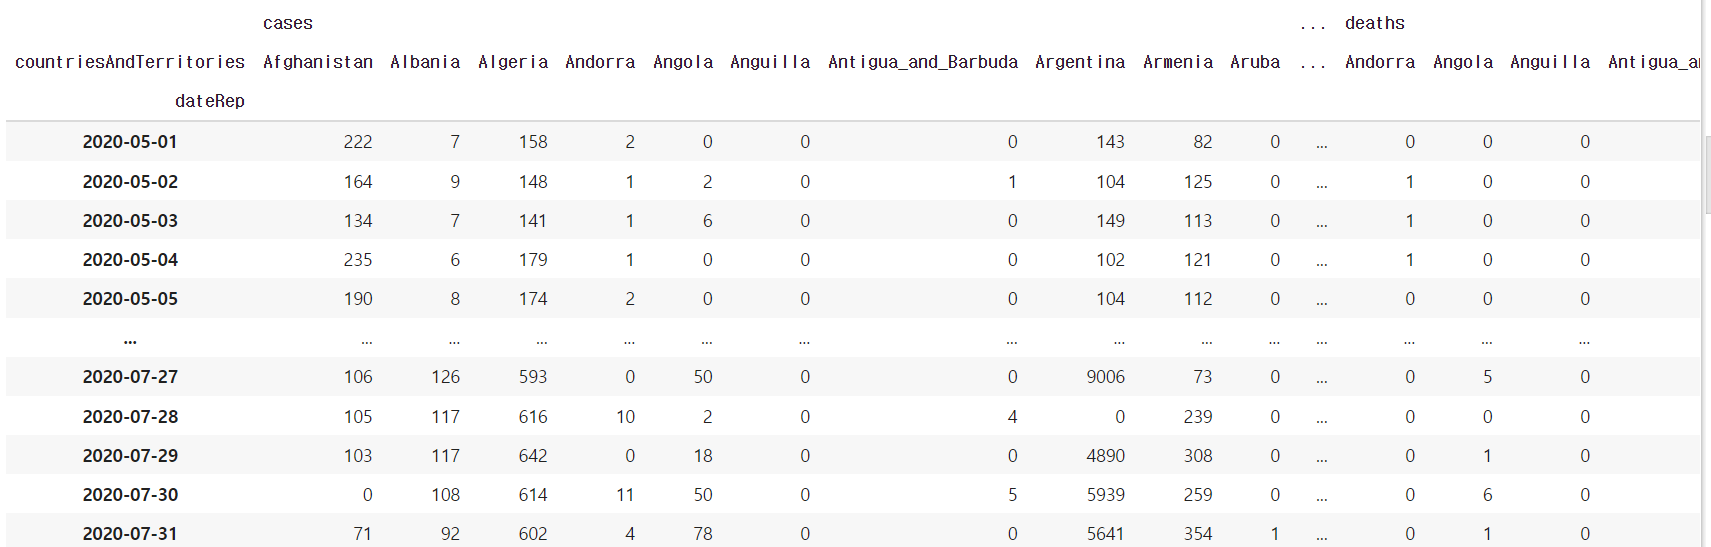

In case you couldn't sove Q3, You can start from 'newd' dataset below.

In [34]:
!gdown --id 19nNmArPvrKzJ0EpU8NpE80kegkQqTDNd

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=19nNmArPvrKzJ0EpU8NpE80kegkQqTDNd
To: /content/processed_Q3.csv
100% 84.3k/84.3k [00:00<00:00, 4.40MB/s]


In [35]:
newd = pd.read_csv('processed_Q3.csv').assign(
        dateRep=lambda x: pd.to_datetime(x.dateRep) ).set_index('dateRep')

In [36]:
## Your codes here


### Q5 Which country has the highest cumulative number of confirmed cases among countries with country names beginning with A? What is that cumulative number of the country?



In case you couldn't sove Q4, You can start from 'newd2' dataset below

In [37]:
!gdown --id 1VHsC88bw46y8kMOKA0HsCMwhOPGyB4GV

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1VHsC88bw46y8kMOKA0HsCMwhOPGyB4GV
To: /content/processed_covid.csv
100% 4.79k/4.79k [00:00<00:00, 13.5MB/s]


In [38]:
newd2 = pd.read_csv('processed_covid.csv').assign(
        dateRep=lambda x: pd.to_datetime(x.dateRep) ).set_index('dateRep')

In [39]:
### Your code here:


### Q6 Make a line plot for following four countries, 'Argentina', 'Afghanistan', 'Armenia', and 'Algeria'. You can start from newd2 data used from Q5.

The result should look like below:
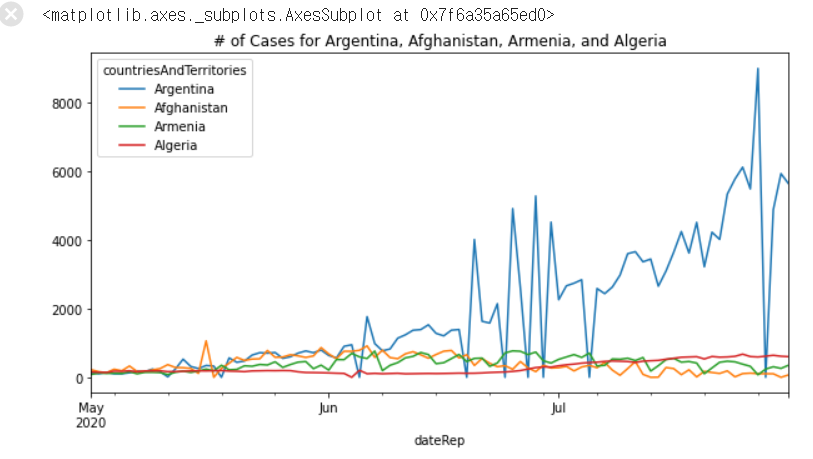

In [40]:
### Your code here:

### Q7 Use rolling 7 days median for cases variable to smooth the previous visualization

The result should look like below:
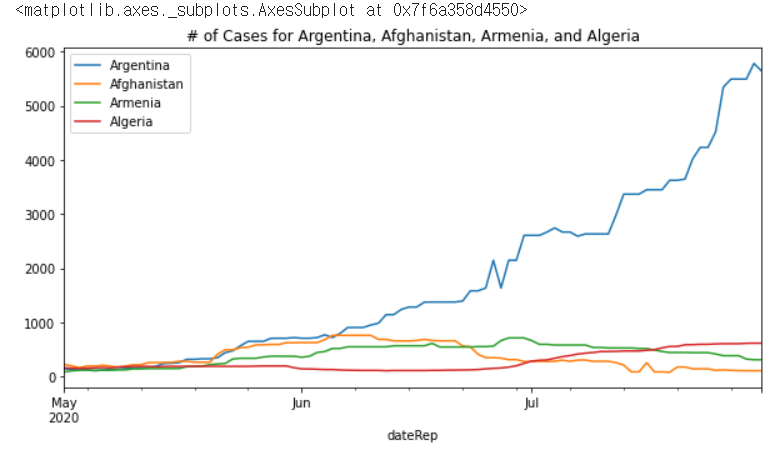

In [41]:
### Your code here:

### Q8 Read the following data preprocessed from Q3 ('newd'). Do the followings:
 - Select 'cases',	'deaths',	'countriesAndTerritories' variables.
 - Calculate total number of cases for each day (Hint: you can use groupby)
 - Add daily total cases variable to the original data, 'newd' having three variables ('cases',	'deaths',	'countriesAndTerritories') (Hint: you can use transform() )

 The result should look like below:
 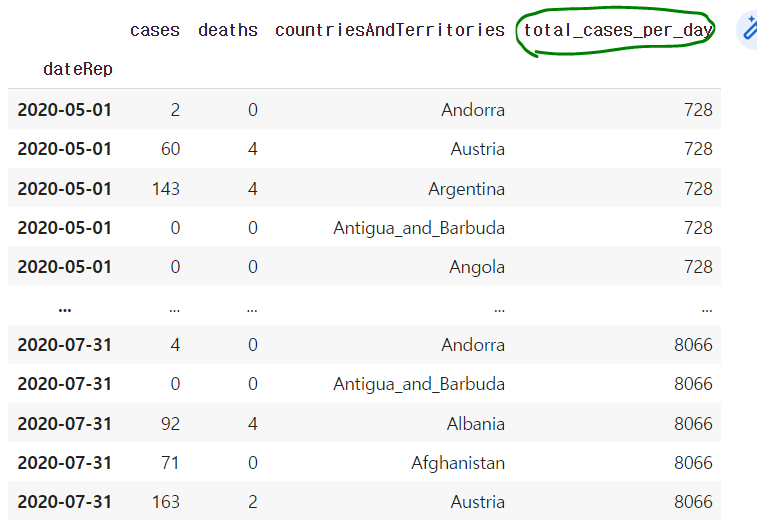

In [42]:
!gdown --id 19nNmArPvrKzJ0EpU8NpE80kegkQqTDNd

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=19nNmArPvrKzJ0EpU8NpE80kegkQqTDNd
To: /content/processed_Q3.csv
100% 84.3k/84.3k [00:00<00:00, 5.87MB/s]


In [43]:
newd = pd.read_csv('processed_Q3.csv').assign(
        dateRep=lambda x: pd.to_datetime(x.dateRep) ).set_index('dateRep')

In [44]:
### Your code here:

### Q9 Make a stacked bar plot:
 - Start from 'newd2' dataset below.
 - Take subset of July in 2020.
 - Create stacked bar plot using following contries: 'Afghanistan', 'Algeria', 'Argentina', 'Armenia', 'Austria', 'Azerbaijan'.
 - Draw stacked bar plot of number of cases for each day. We would like to see how many cases for the above contries.

 The result should look like below:
 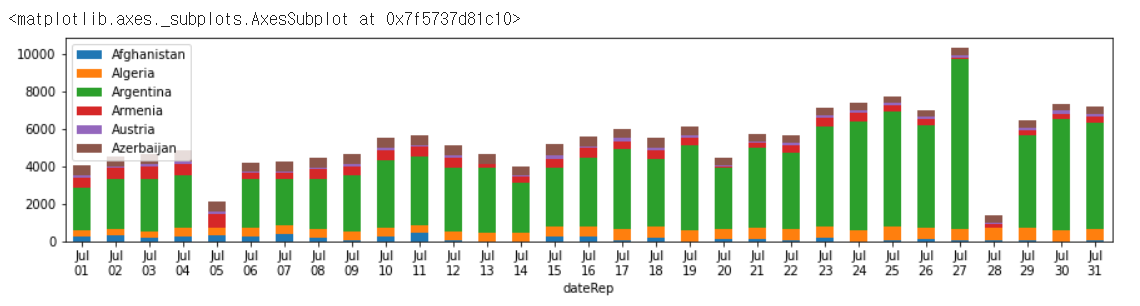

In [45]:
!gdown --id 1VHsC88bw46y8kMOKA0HsCMwhOPGyB4GV

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1VHsC88bw46y8kMOKA0HsCMwhOPGyB4GV
To: /content/processed_covid.csv
100% 4.79k/4.79k [00:00<00:00, 13.4MB/s]


In [46]:
newd2 = pd.read_csv('processed_covid.csv').assign(
        dateRep=lambda x: pd.to_datetime(x.dateRep) ).set_index('dateRep')

In [47]:
### Your code here:

### Q10 From covid19 data ('covid') do the followings
 - Take subset of year 2020
 - Calculate number of cases for each month for each continent ('continentExp')
 - Visualize this information using barplot


 The result should look like below:
 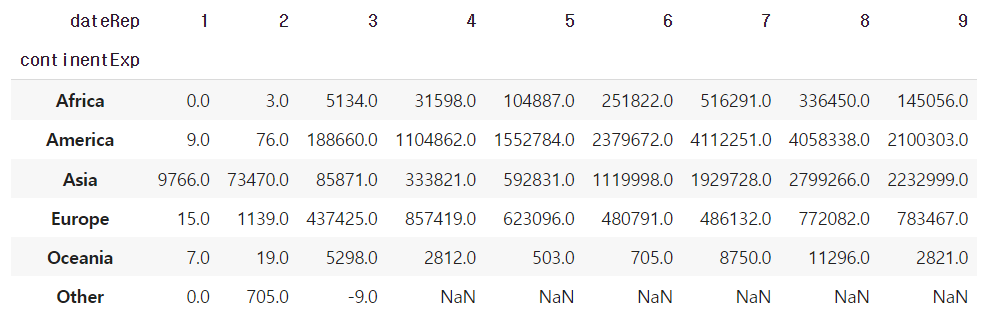

Barplot:


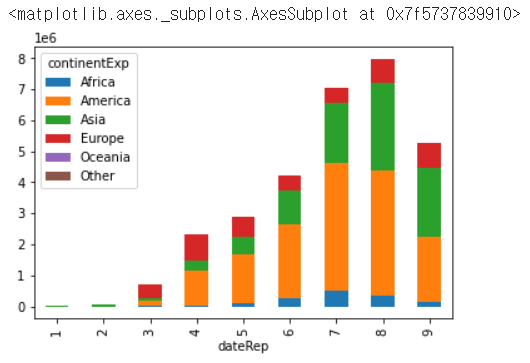

In [48]:
### Your code here: